In [ ]:
# !pip install fbprophet
# !pip install finance-datareader
# !pip install prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import FinanceDataReader as fdr



---



---



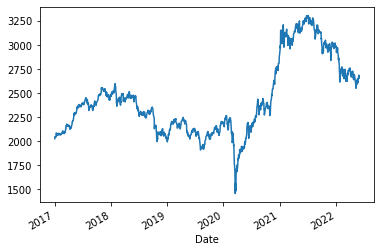

In [ ]:
_df = fdr.DataReader('KS11', '2017')
_df['Close'].plot()

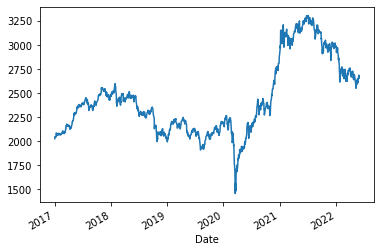

In [ ]:
m = Prophet()
_df['Close'].plot()
plt.show()

In [ ]:
prophet_series = pd.DataFrame(list(zip(_df.index, _df['Close'])),columns=['ds', 'y'])
m.fit(prophet_series)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


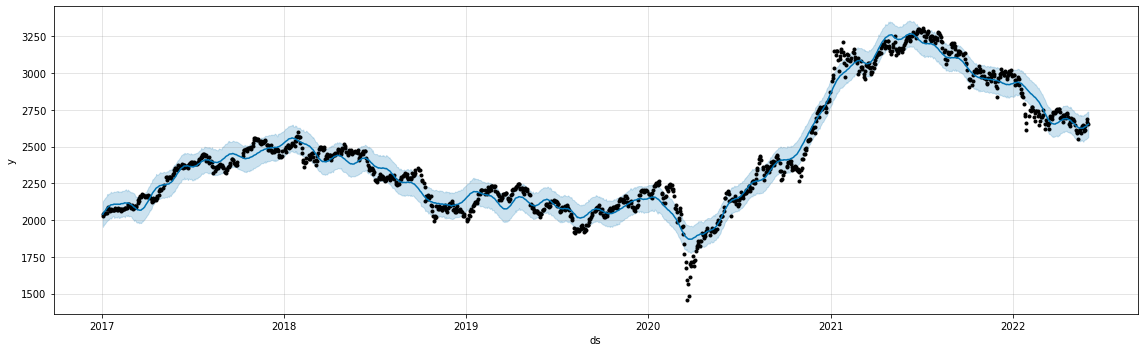

In [ ]:
forecast = m.predict(prophet_series)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

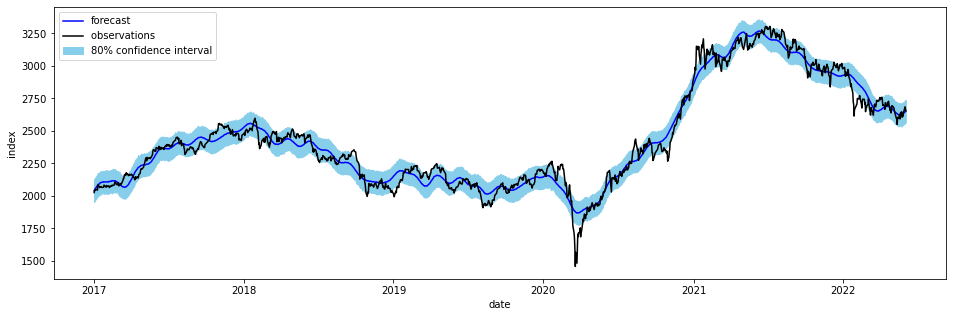

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations ', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(), forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('date')
plt.ylabel('index')
plt.show()

In [ ]:
_future =  m.make_future_dataframe(periods=180)

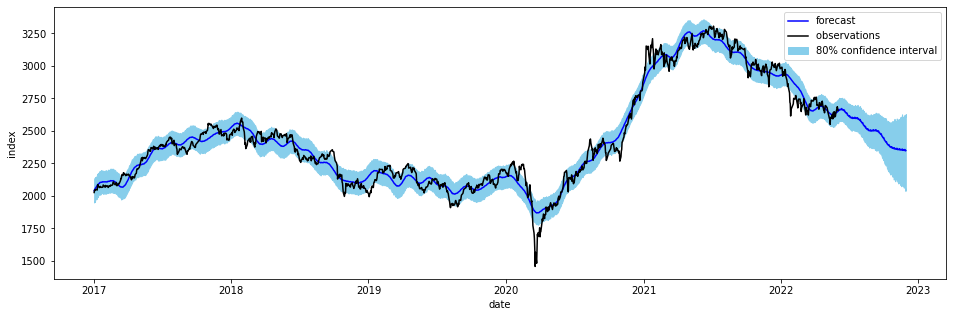

In [ ]:
forecast = m.predict(_future)
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations ', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(), forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('date')
plt.ylabel('index')
plt.show()

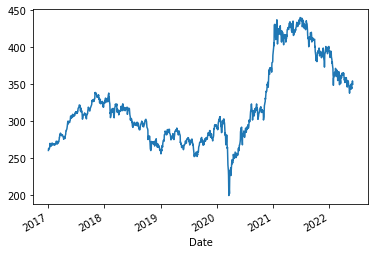

In [ ]:
df = fdr.DataReader('KS200', '2017')
df['Close'].plot()

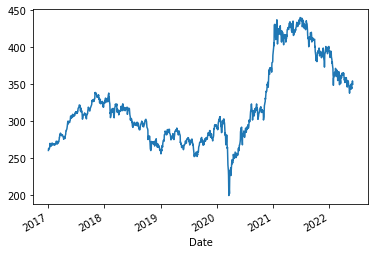

In [ ]:
m = Prophet()
df['Close'].plot()
plt.show()

In [ ]:
prophet_series = pd.DataFrame(list(zip(df.index, df['Close'])),columns=['ds', 'y'])
m.fit(prophet_series)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


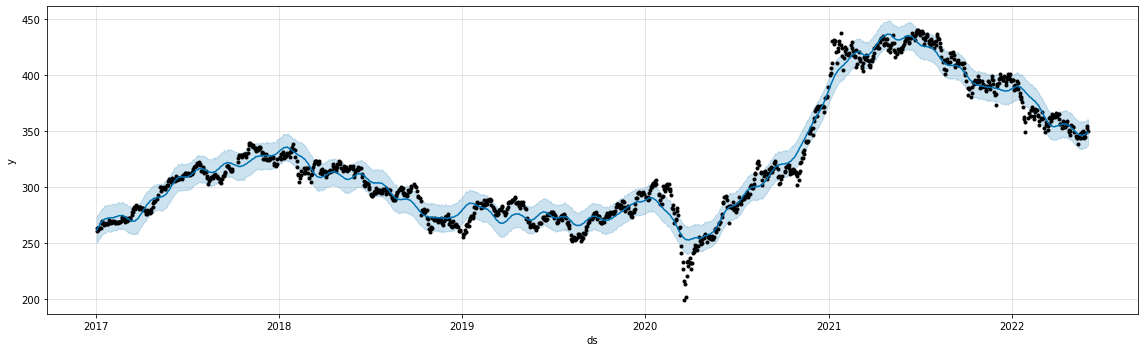

In [ ]:
forecast = m.predict(prophet_series)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

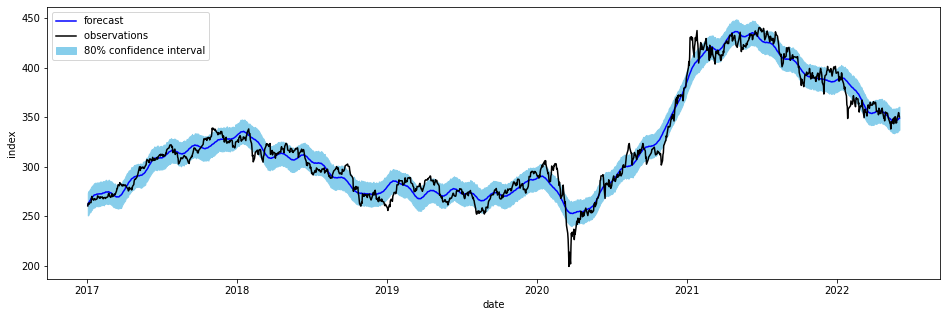

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations ', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(), forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('date')
plt.ylabel('index')
plt.show()

In [ ]:
future =  m.make_future_dataframe(periods=180)

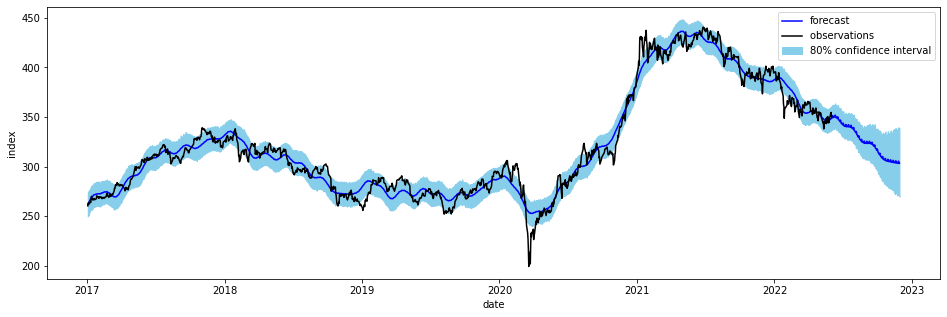

In [ ]:
forecast = m.predict(future)
fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast['ds'].dt.to_pydatetime(),forecast['yhat'], label='forecast', color='blue')
plt.plot(prophet_series['ds'].dt.to_pydatetime(),prophet_series['y'], label='observations ', color='black')
plt.fill_between(forecast['ds'].dt.to_pydatetime(), forecast['yhat_upper'],forecast['yhat_lower'],color='skyblue',label='80% confidence interval')
plt.legend()
plt.xlabel('date')
plt.ylabel('index')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


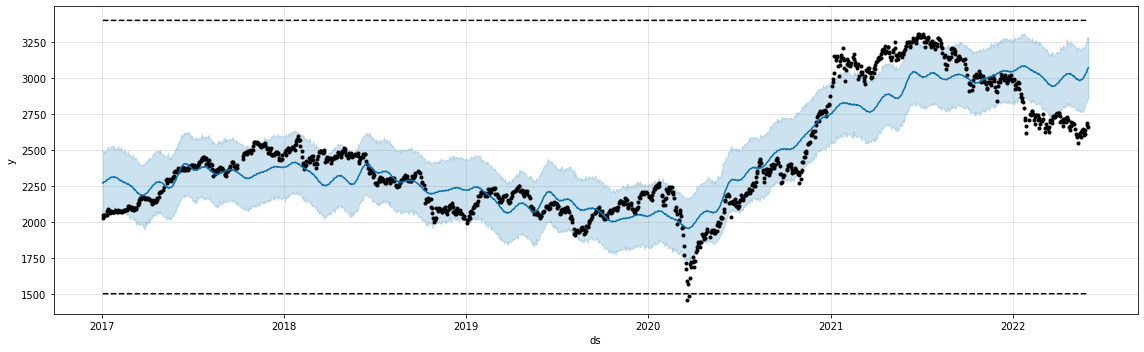

In [ ]:
m = Prophet(growth = 'logistic')
prophet_series = pd.DataFrame(list(zip(_df.index, _df['Close'])),columns=['ds', 'y'])
prophet_series['cap'] = 3400
prophet_series['floor'] = 1500
m.fit(prophet_series)
forecast = m.predict(prophet_series)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


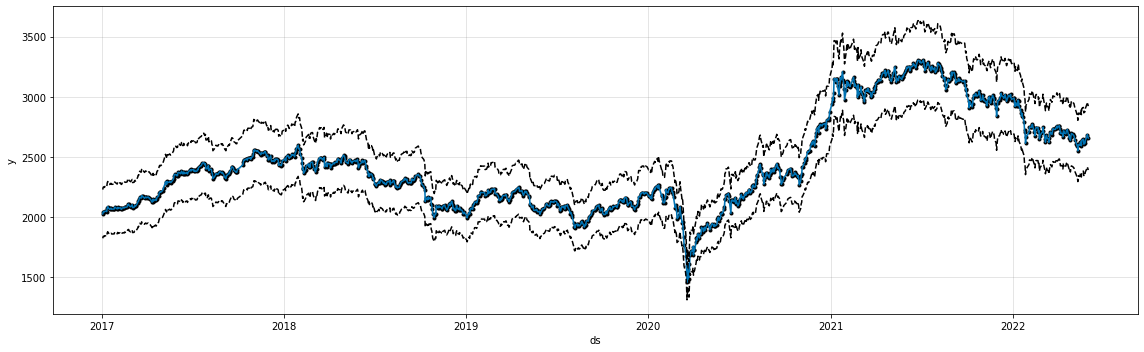

In [ ]:
m = Prophet(growth = 'logistic')
prophet_series = pd.DataFrame(list(zip(_df.index, _df['Close'])),columns=['ds', 'y'])
prophet_series['cap'] = prophet_series['y'] * 1.1
prophet_series['floor'] = prophet_series['y'] * 0.9
m.fit(prophet_series)
forecast = m.predict(prophet_series)
fig, ax = plt.subplots(figsize=(16,5))
m.plot(forecast, ax=ax)
plt.show()



---



---



In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

import pandas_datareader.data as web # 주식 데이터를 얻어오기 위해 사용
import datetime # 시간 처리
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터를 가져오고 나서, 이동평균을 구해야함.
# 국내 종목 : 삼성전자

# 날짜 : 3년 간 삼성전자 주가 분석(2017.01.02) ~ (2021.06.07)
start = datetime.datetime( 2017, 1, 2 )
end = datetime.datetime( 2022, 5, 16)

In [ ]:
# 종목코드, 시작일, 종료일 넣고 자동으로 차트만들어주는 함수
def makeStockChart( code, sDay=start, eDay=end
                   ,*args, **kwargs):
  '''
  이 함수는 종목코드와 조회시작일, 종료일을 넣으면 차트를 그려준다.
  이동 평균선은 5일, 20일, 60일, 120일 지원
  '''

  #데이터 가져오기
  datas = web.DataReader( code, 'yahoo', sDay, eDay)

  #데이터 파생변수추가
  tmp =     datas['Adj Close']
  datas['5MA'] = tmp.rolling( window=5 ).mean()
  datas['20MA'] = tmp.rolling( window=20 ).mean()
  datas['60MA'] = tmp.rolling( window=60 ).mean()
  datas['120MA'] = tmp.rolling( window=120 ).mean()

  #차트그리기(시각화)
  plt.figure (  figsize=(12, 6) )
  plt.plot( datas.Close,   label='Close' )
  plt.plot(datas['5MA'],    label='5MA')
  plt.plot(datas['20MA'],   label='20MA')
  plt.plot(datas['60MA'],   label='60MA')
  plt.plot(datas['120MA'],   label='120MA')
  plt.title(f"{code}'s stock chart")
  plt.legend()
  plt.show()

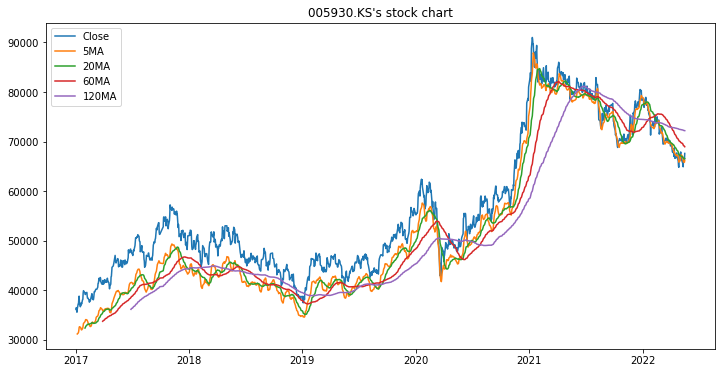

In [ ]:
samsung_code = '005930.KS'
makeStockChart( code=samsung_code )

In [ ]:
# 데이터 가져오기
datas = web.DataReader( samsung_code, 'yahoo', start, end)

# 컬럼 ds(YYYY-MM-DD), y(종가 : Close) 구성
# 해당 구저의 DateFrame만들기 위한 딕셔너리 선언

dic = {
    'ds' : datas.index,
    'y' : datas.Close
}

# ds 와 y를 컬럼으로 갖는 데이터 프레임 생성
df = pd.DataFrame( dic )

#인덱스 초기화(원본 까지 적용)
df.reset_index( inplace=True )

# 'ds' 컬럼과 중복되는 'Date' 컬럼 제거
del df['Date']

# 페이스북의 시계열 예측 모델에 사용한 데이터 준비
df.head(5)

,ds,y
0,2017-01-02,36100.0
1,2017-01-03,36480.0
2,2017-01-04,36160.0
3,2017-01-05,35560.0
4,2017-01-06,36200.0


             ds          yhat    yhat_lower    yhat_upper
1315 2022-05-17  66225.102065  63242.653034  69284.463880
1316 2022-05-18  66103.331947  63042.120562  69101.232927
1317 2022-05-19  66056.535965  62874.901865  69111.888943
1318 2022-05-20  65920.721370  62668.090933  68973.325292
1319 2022-05-21  66281.712259  62992.215496  69216.512898
1320 2022-05-22  66260.098256  63043.334162  69285.802322
1321 2022-05-23  65878.644352  62886.039431  69112.790668
1322 2022-05-24  66009.077246  62820.453775  69265.433318
1323 2022-05-25  65947.671099  62711.519733  69205.791719
1324 2022-05-26  65959.082187  62965.261566  68795.139461
1325 2022-05-27  65878.234114  62801.974056  69015.644487


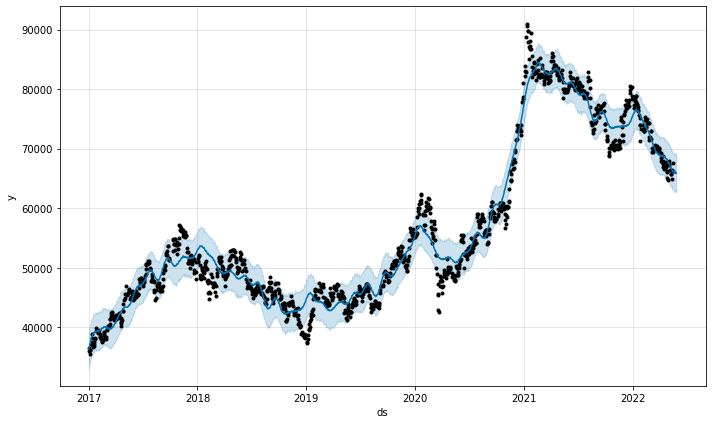

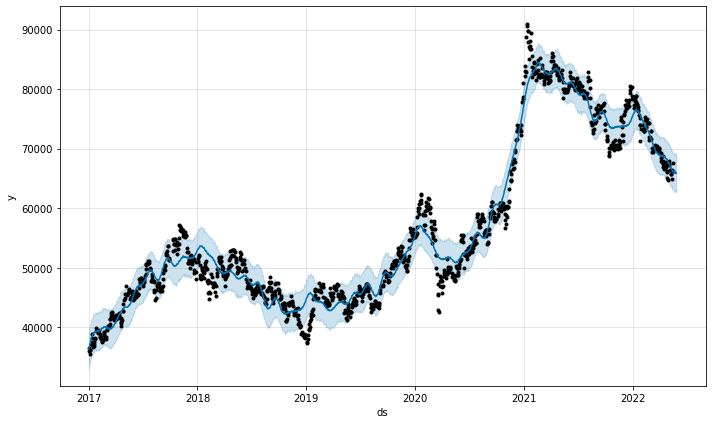

In [ ]:
# prophet 모듈 세팅
from fbprophet import Prophet

# Day 단위로 데이터가 구성되어 있으므로, 일 단위 주기성 활성화
model = Prophet( daily_seasonality=True ) 

# 데이터 학습 시작 -> 기계학습
model.fit( df )

# 주가 예측 위한 날짜 데이터 세팅 -> 기존 데이터 + 향후 10일치 예측값
future = model.make_future_dataframe( periods=10 )

# 주가 예측
forecast = model.predict( future )

# forecast.columns ->
'''
  Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')
''' 

# 필요한 컬럼만 보기
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11))

# 모델이 제공하는 시각화
model.plot(forecast)

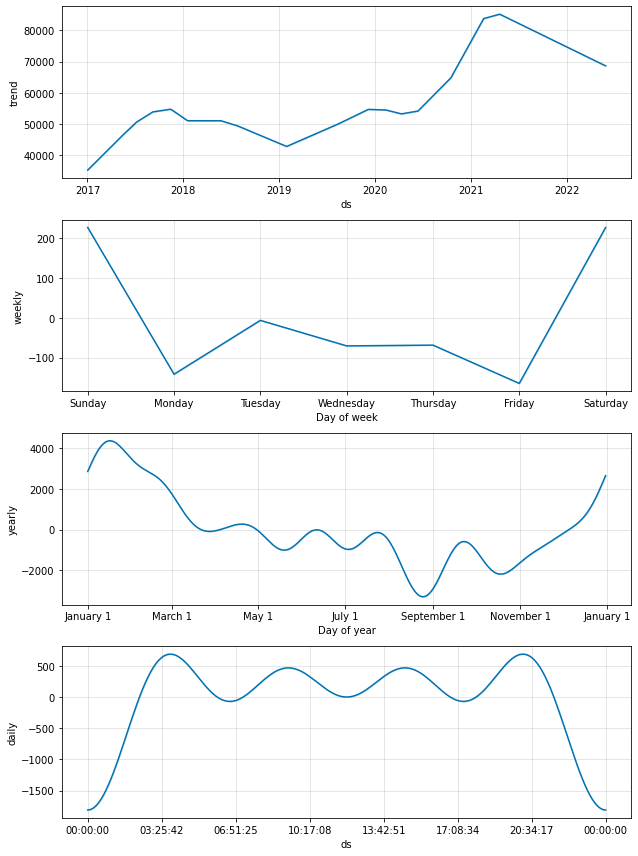

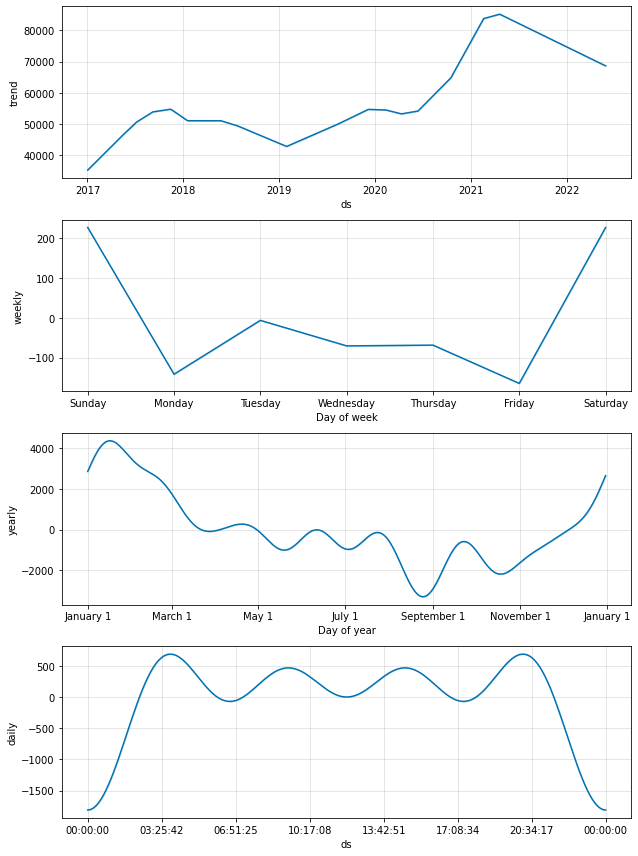

In [ ]:
model.plot_components( forecast )